In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
df = pd.read_csv("census_income.csv")
df.columns#printing all the columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [56]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [57]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Both numerical and categorical values are present in database.

In [58]:
#Checking unique values in target column
df['Income'].nunique()

2

Since we have only two values in target column hence it is a classification problem

In [59]:
df.isnull().sum()


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null data present

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Shape of dataset is 32560 rows and 15 columns

In [61]:
#Dropping column "Education" as we have column "Education_num" (numeric representation of 'Education' column)
df = df.drop(["Education"], axis=1)

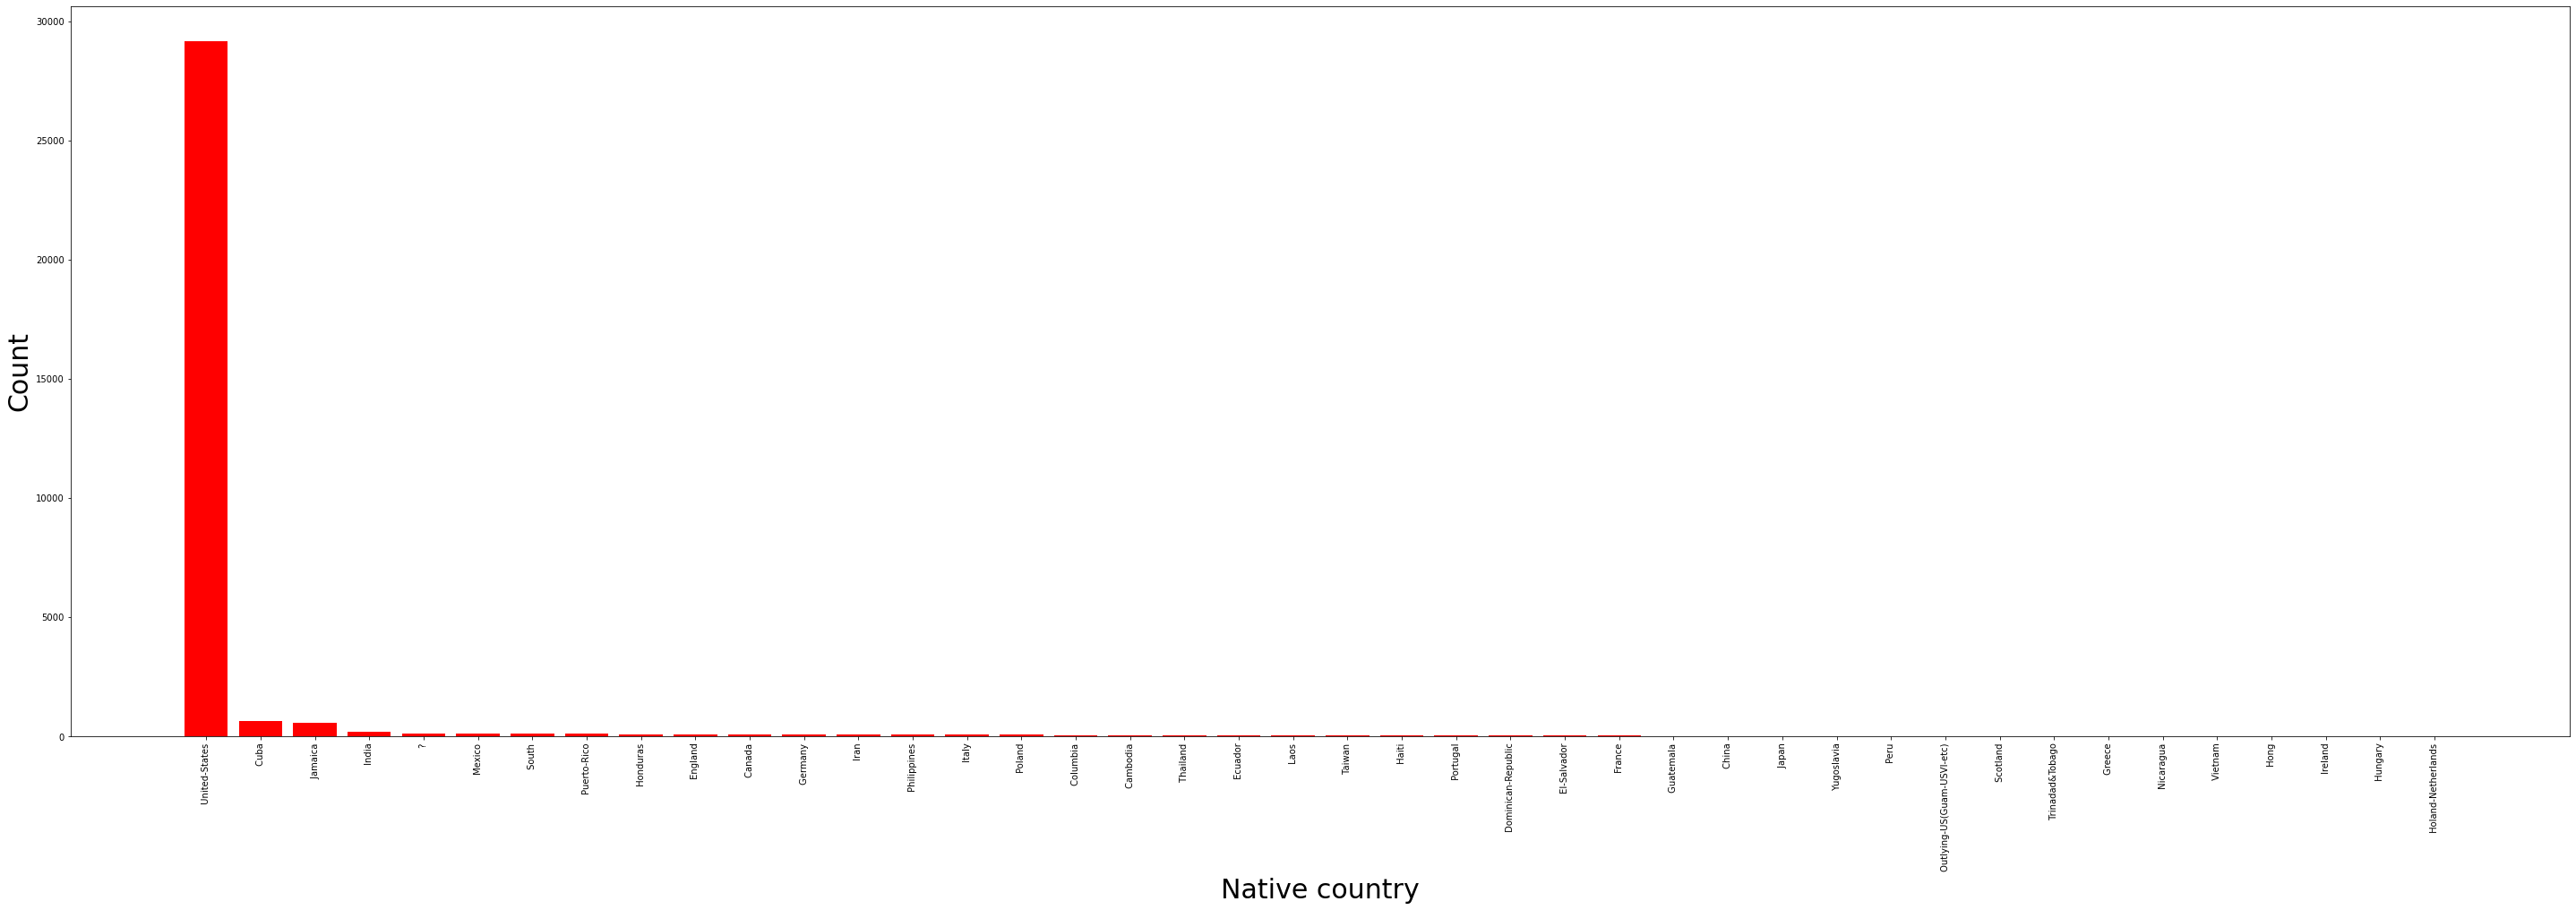

In [62]:
plt.figure(figsize=(50,15))
plt.bar(list(df['Native_country'].unique()),list(df['Native_country'].value_counts()),color = 'r')
plt.xticks(rotation=90)
plt.xlabel("Native country",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.show()

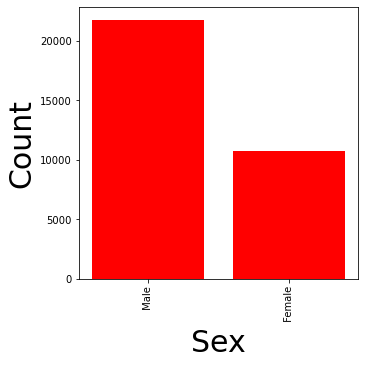

In [63]:
plt.figure(figsize=(5,5))
plt.bar(df['Sex'].unique(),list(df['Sex'].value_counts()),color = 'r')
plt.xticks(rotation=90)
plt.xlabel("Sex",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.show()

Sex:Male      -21789,
 Female    -10771

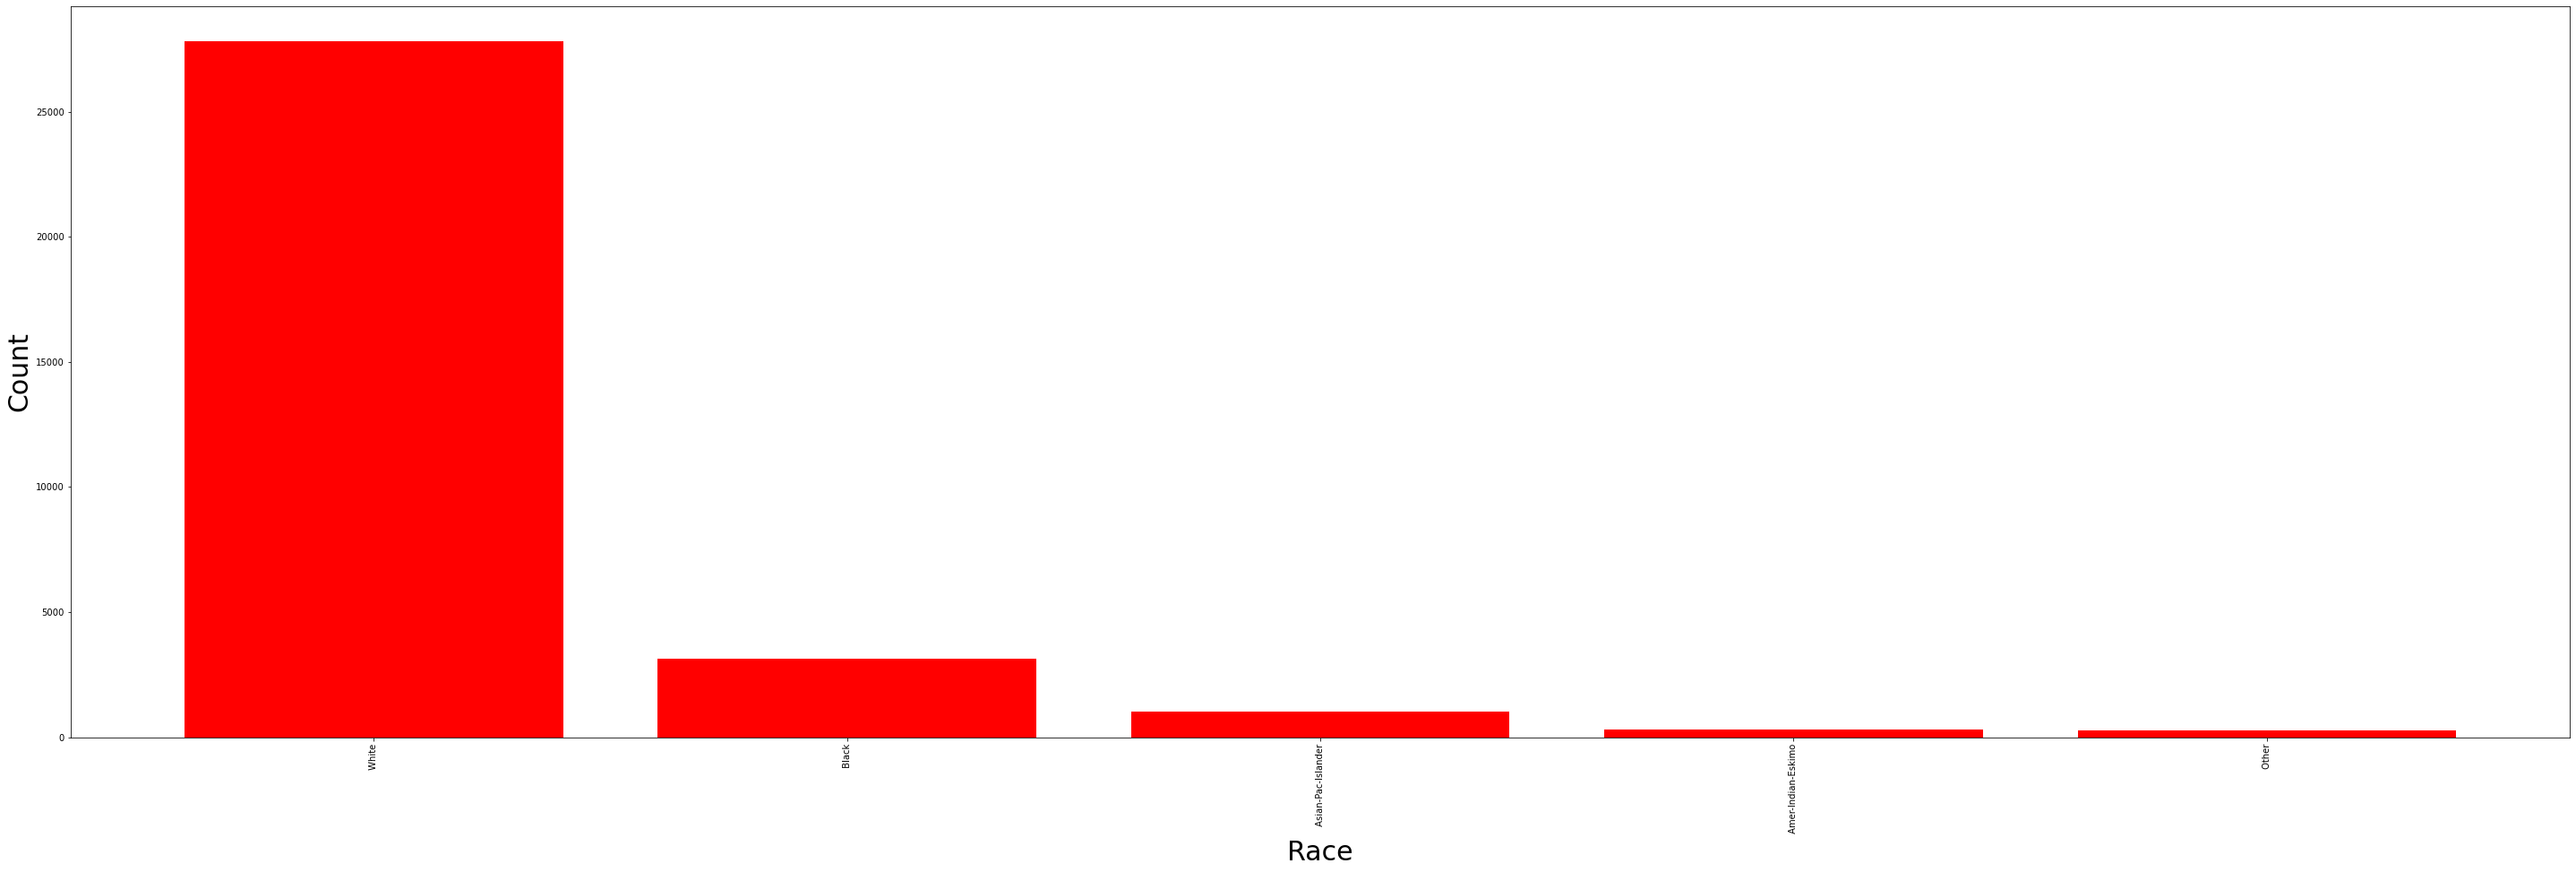

In [13]:
plt.figure(figsize=(50,15))
plt.bar(df['Race'].unique(),list(df['Race'].value_counts()),color = 'r')
plt.xticks(rotation=90)
plt.xlabel("Race",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.show()

Race:  White                 -27815,
 Black                  -3124,
 Asian-Pac-Islander     -1039,
 Amer-Indian-Eskimo      -311,
 Other                   -271

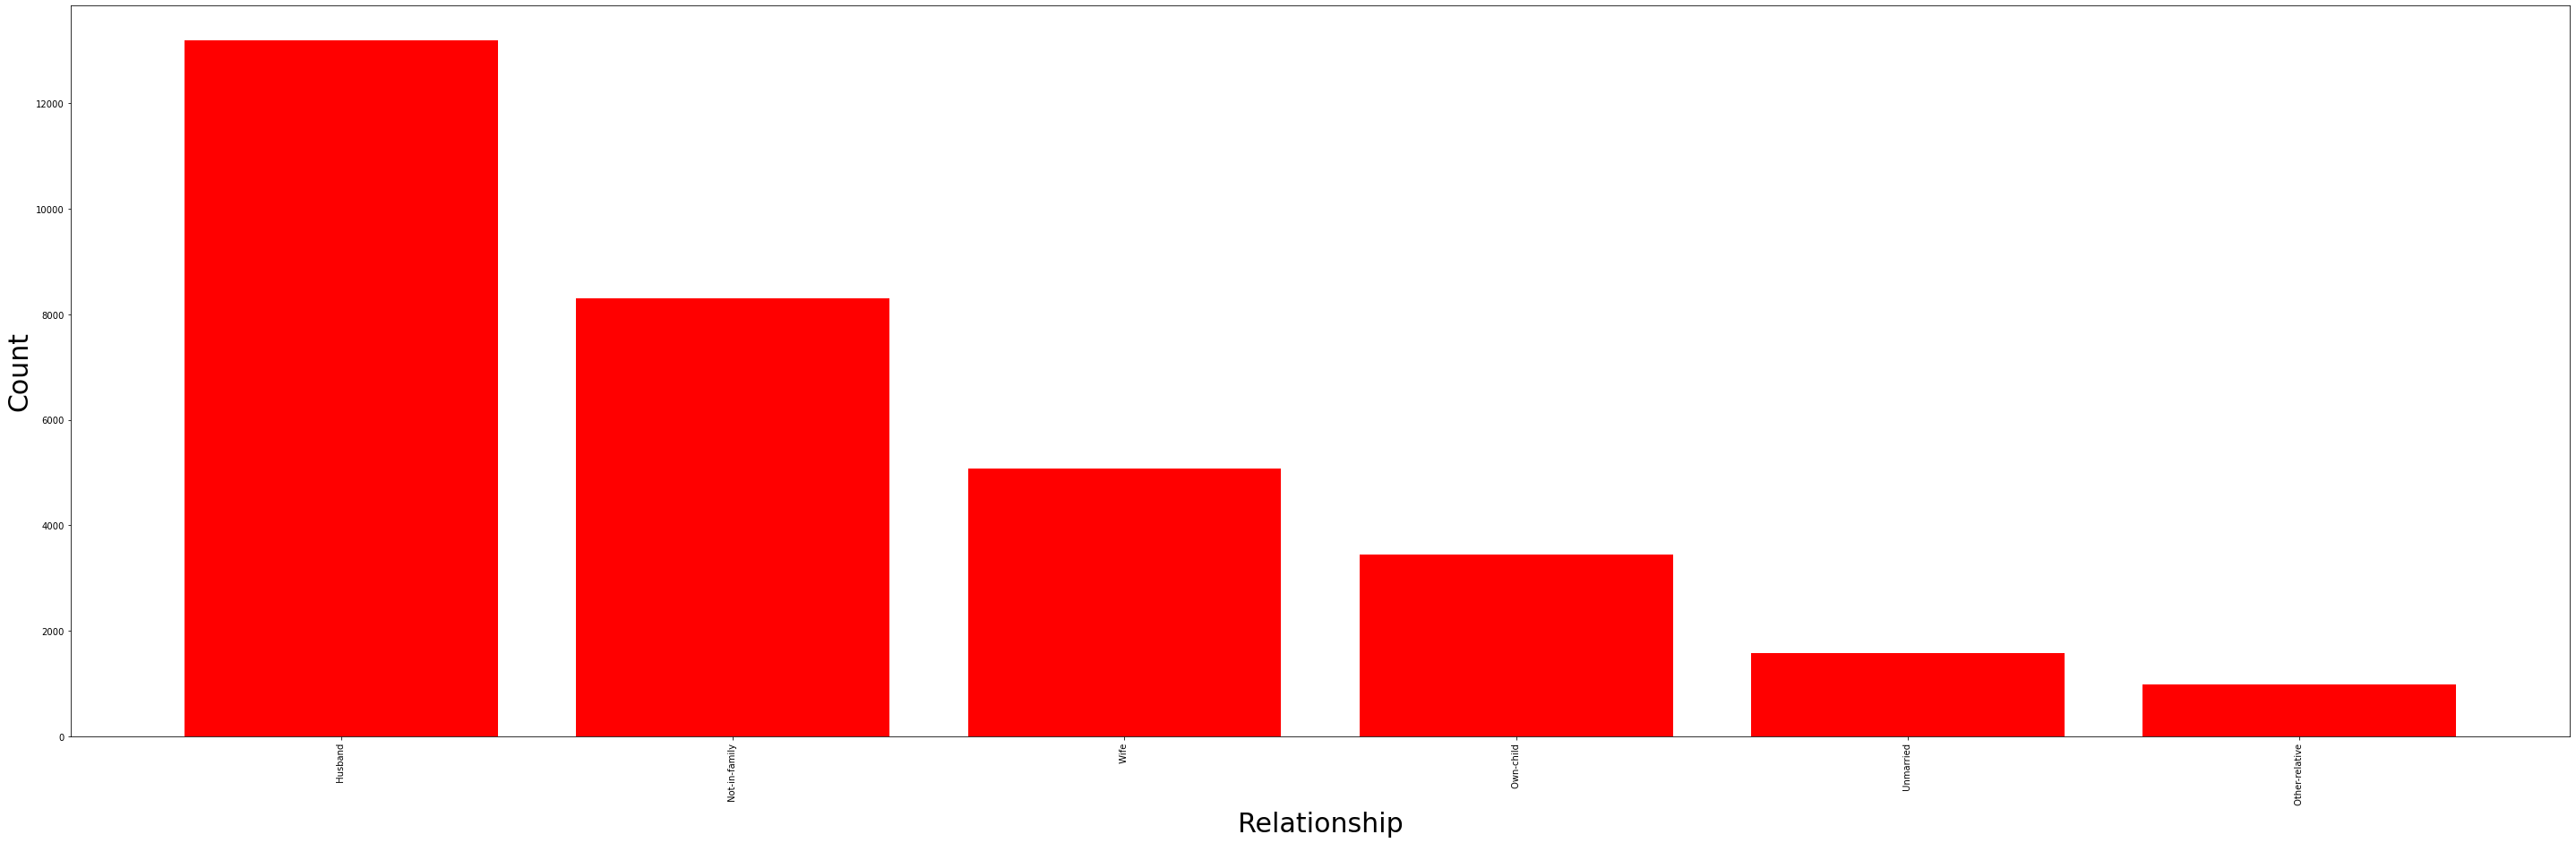

In [14]:
plt.figure(figsize=(50,15))
plt.bar(df['Relationship'].unique(),list(df['Relationship'].value_counts()),color = 'r')
plt.xticks(rotation=90)
plt.xlabel("Relationship",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.show()

Relation: Husband           -13193,
 Not-in-family      -8304,
 Own-child          -5068,
 Unmarried          -3446,
 Wife               -1568,
 Other-relative      -981

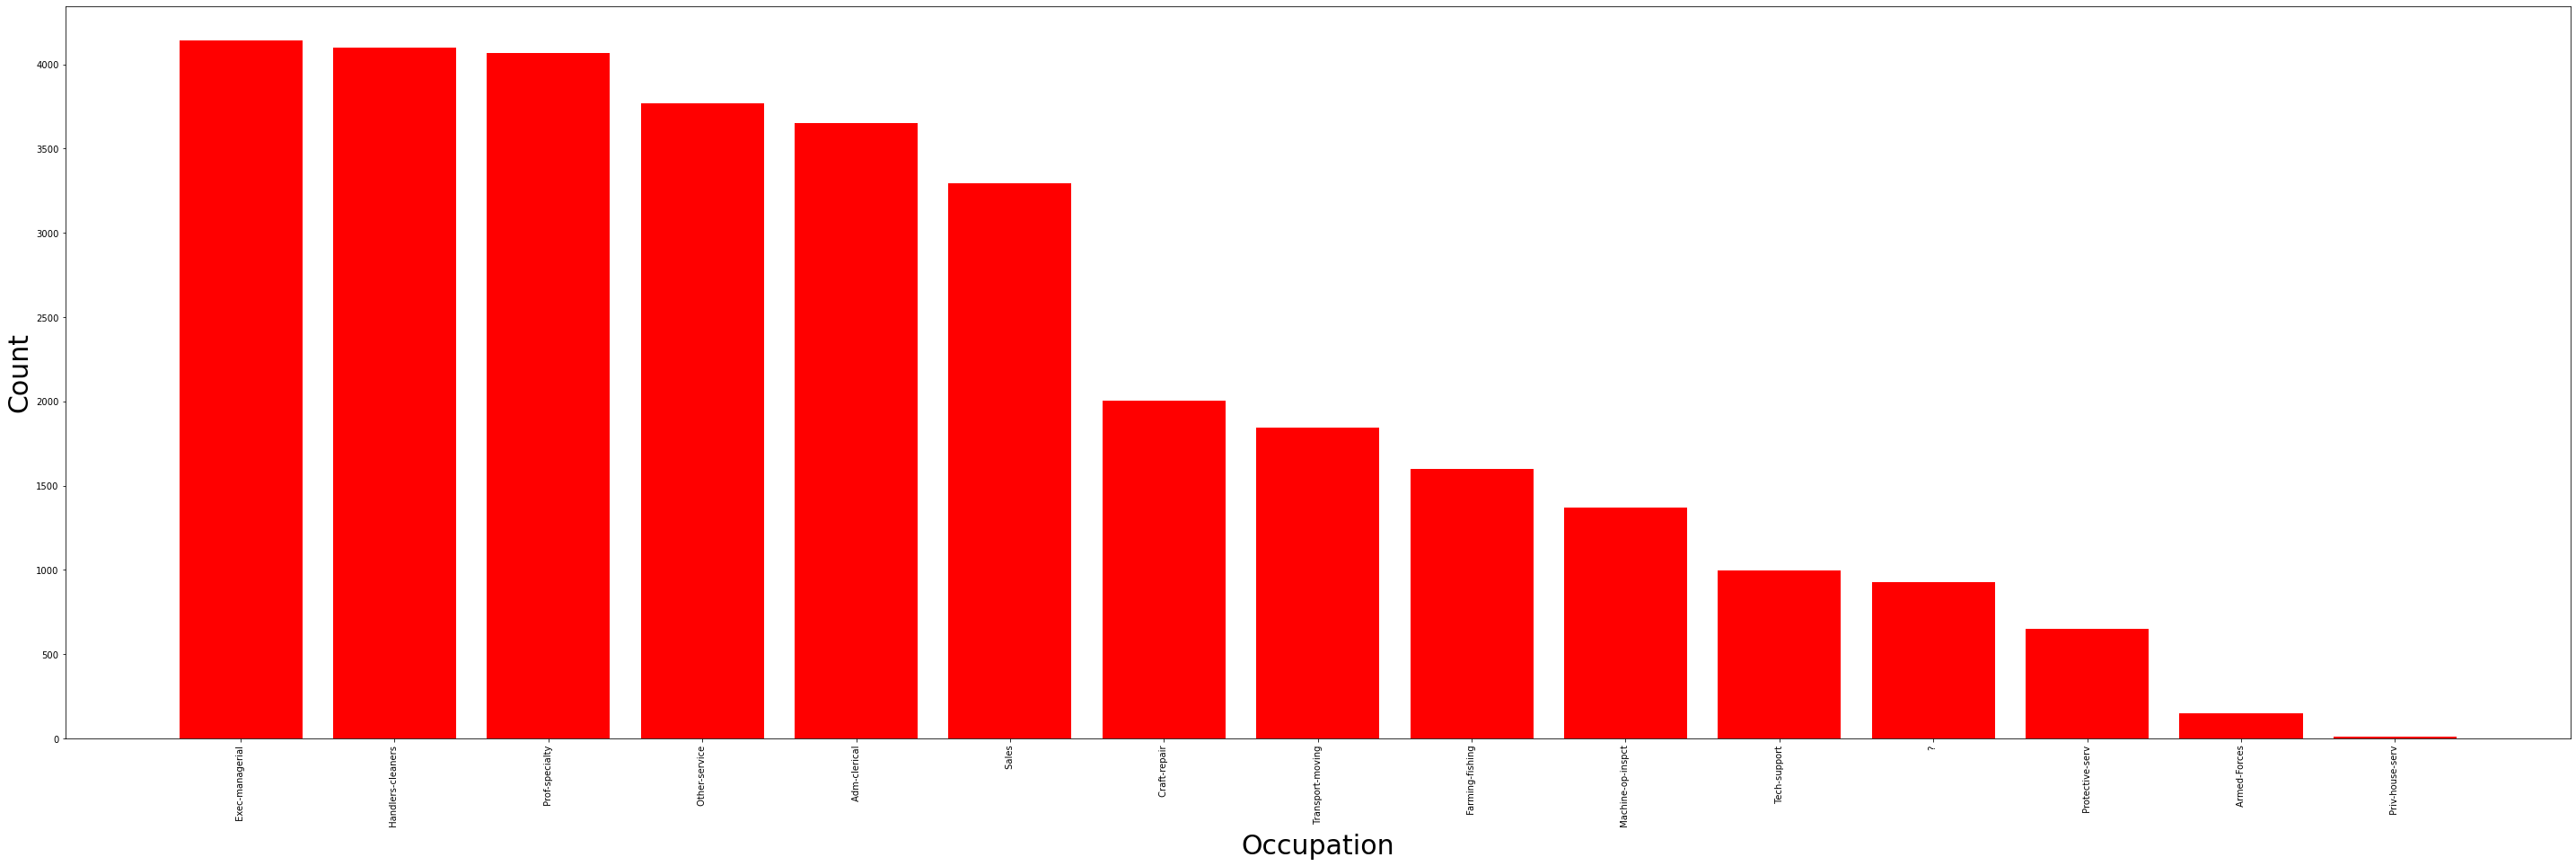

In [15]:
plt.figure(figsize=(50,15))
plt.bar(df['Occupation'].unique(),list(df['Occupation'].value_counts()),color = 'r')
plt.xticks(rotation=90)
plt.xlabel("Occupation",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.show()

Occupation:Prof-specialty       -4140,
 Craft-repair         -4099,
 Exec-managerial      -4066,
 Adm-clerical         -3769,
 Sales                -3650,
 Other-service        -3295,
 Machine-op-inspct    -2002,
 ?                    -1843,
 Transport-moving     -1597,
 Handlers-cleaners    -1370,
 Farming-fishing       -994,
 Tech-support         - 928,
 Protective-serv       -649,
 Priv-house-serv       -149,
 Armed-Forces            -9

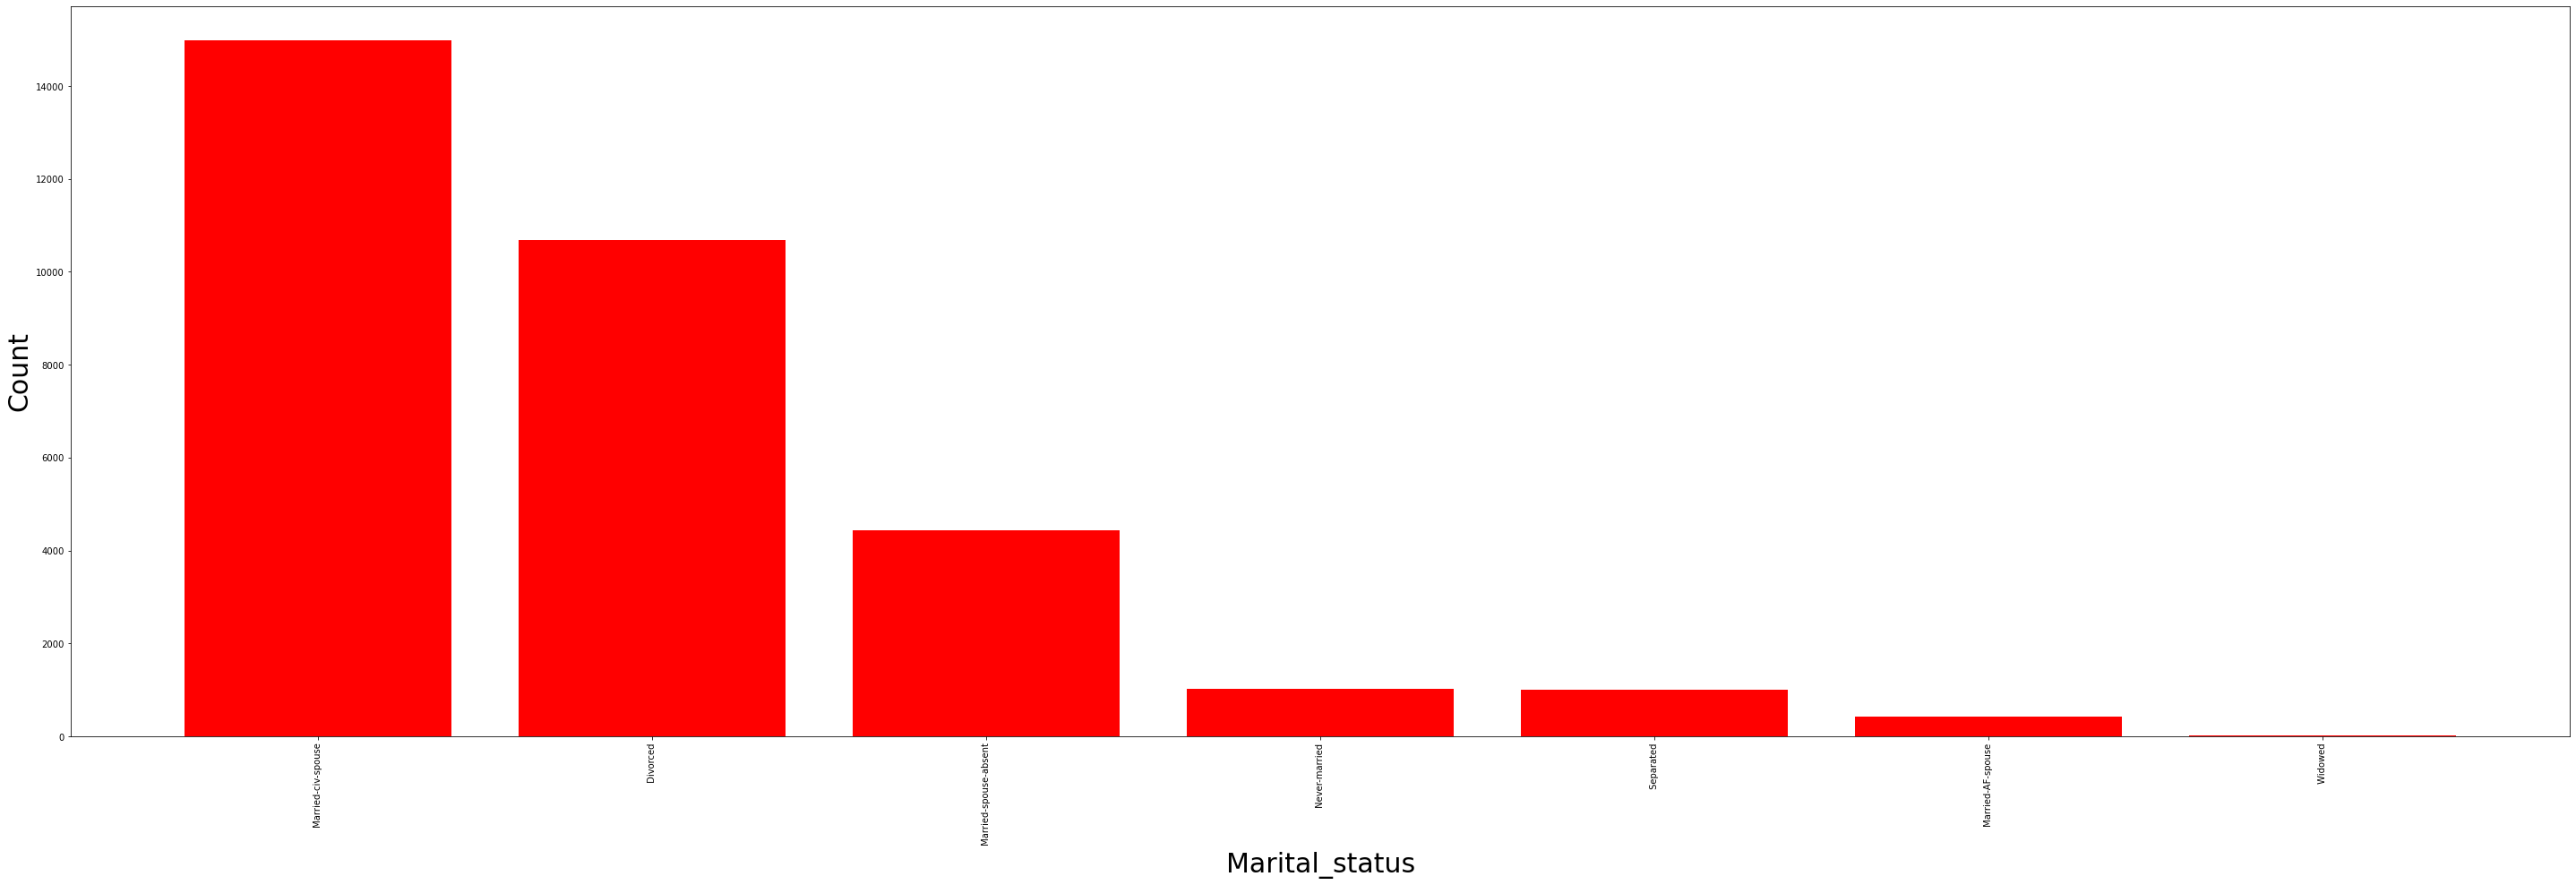

In [16]:
plt.figure(figsize=(50,15))
plt.bar(df['Marital_status'].unique(),list(df['Marital_status'].value_counts()),color = 'r')
plt.xticks(rotation=90)
plt.xlabel("Marital_status",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.show()

Marital status: Married-civ-spouse       -14976,
 Never-married            -10682,
 Divorced                  -4443,
 Separated                 -1025,
 Widowed                    -993,
 Married-spouse-absent      -418,
 Married-AF-spouse          - 23

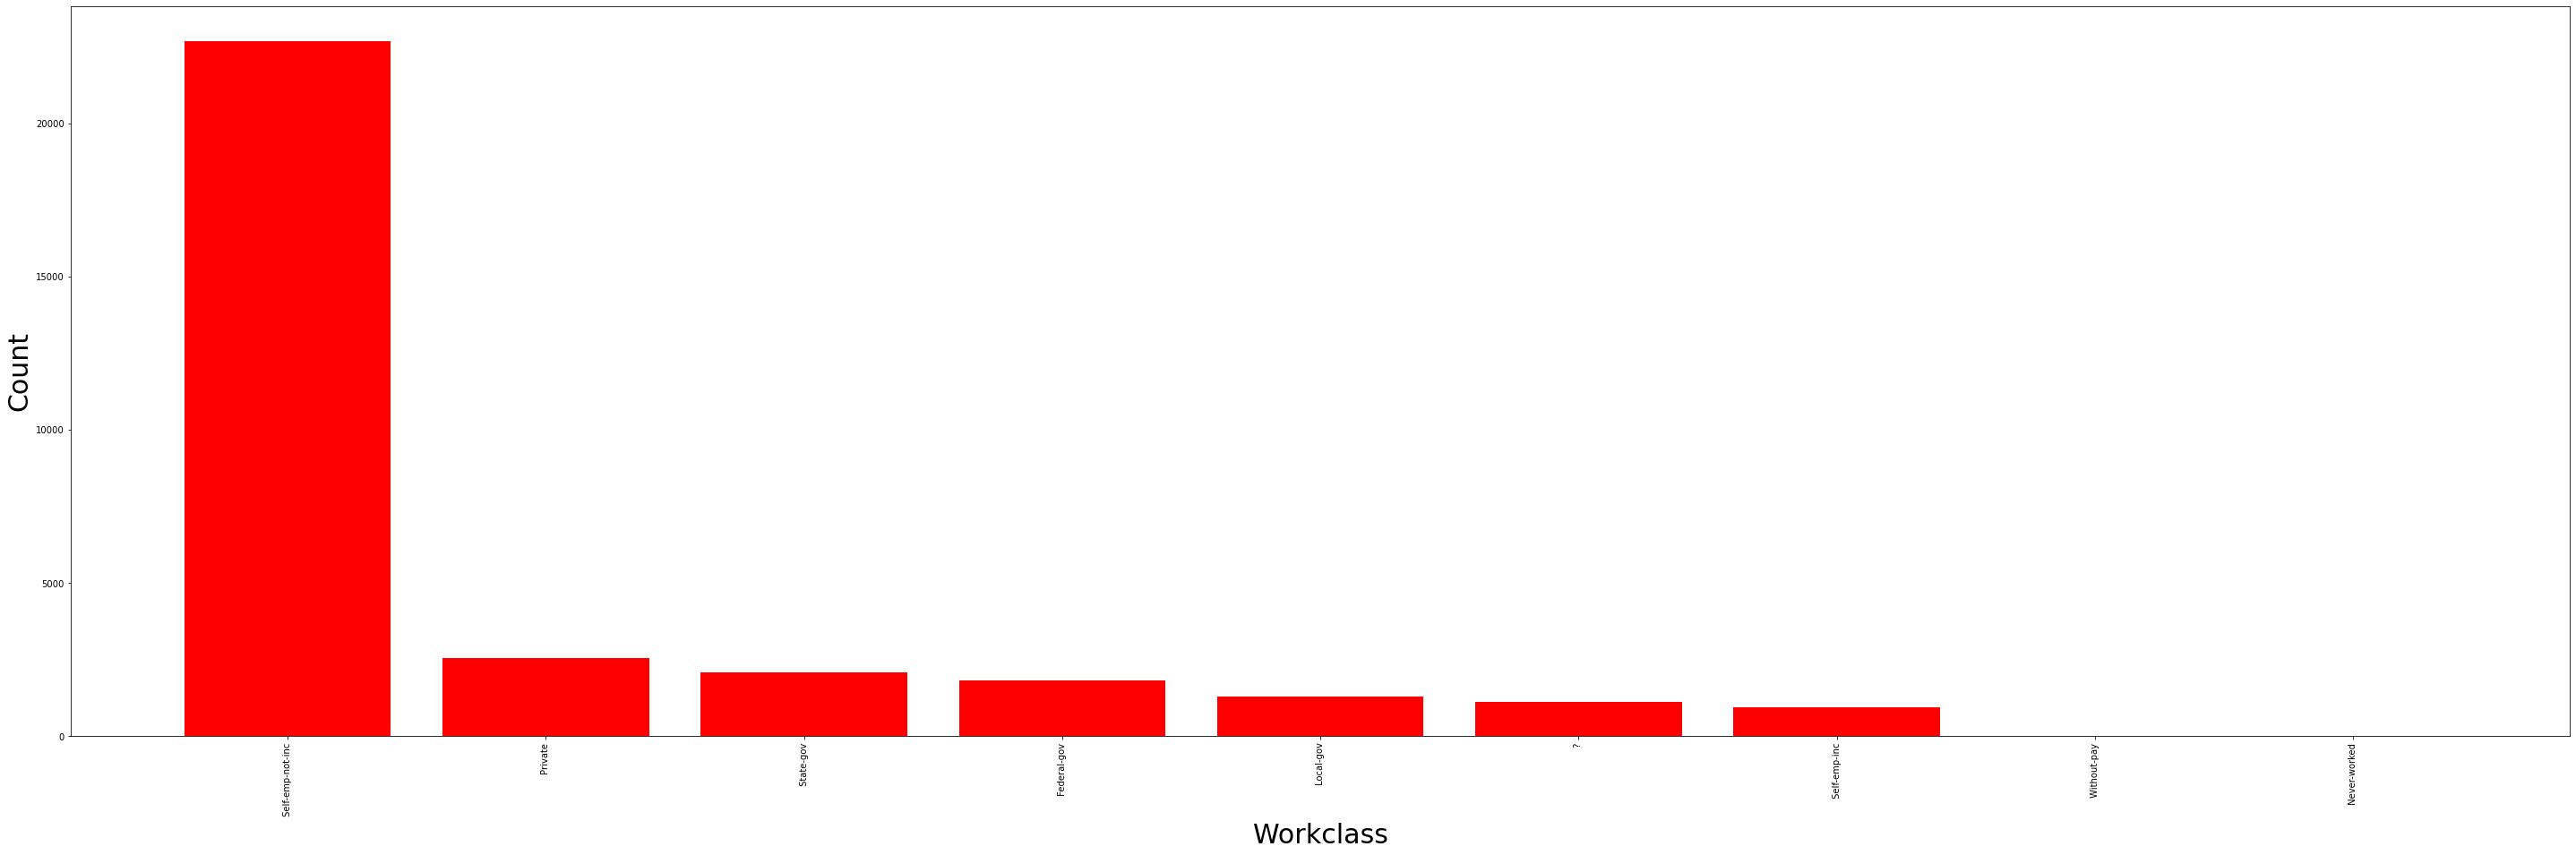

In [17]:
plt.figure(figsize=(50,15))
plt.bar(df['Workclass'].unique(),list(df['Workclass'].value_counts()),color = 'r')
plt.xticks(rotation=90)
plt.xlabel("Workclass",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.show()

Workclass:Private             -22696,
 Self-emp-not-inc     -2541,
 Local-gov            -2093,
 ?                    -1836,
 State-gov            -1297,
 Self-emp-inc        - 1116,
 Federal-gov          - 960,
 Without-pay          -  14,
 Never-worked         -   7

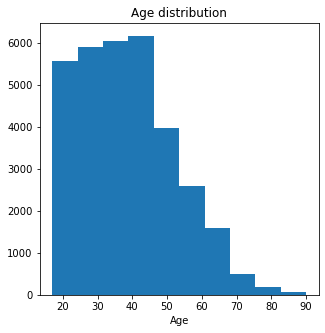

In [18]:
plt.figure(figsize=(5,5))
plt.hist(df['Age'])
plt.title('Age distribution')
plt.xlabel("Age")
plt.show()

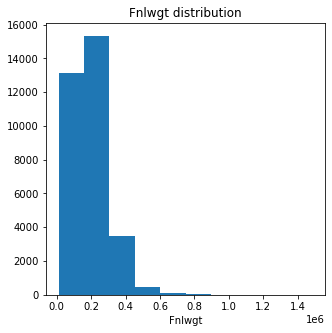

In [19]:
plt.figure(figsize=(5,5))
plt.hist(df['Fnlwgt'])
plt.title('Fnlwgt distribution')
plt.xlabel("Fnlwgt")
plt.show()

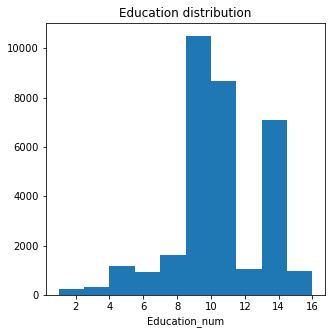

In [20]:
plt.figure(figsize=(5,5))
plt.hist(df['Education_num'])
plt.title('Education distribution')
plt.xlabel("Education_num")
plt.show()

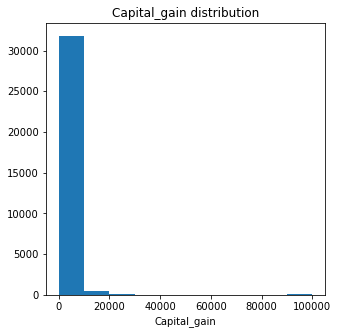

In [21]:
plt.figure(figsize=(5,5))
plt.hist(df['Capital_gain'])
plt.title('Capital_gain distribution')
plt.xlabel("Capital_gain")
plt.show()

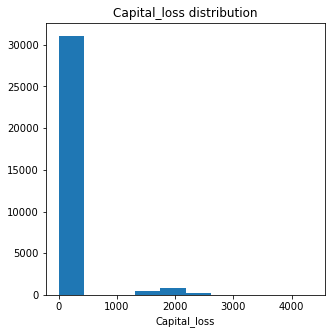

In [22]:
plt.figure(figsize=(5,5))
plt.hist(df['Capital_loss'])
plt.title('Capital_loss distribution')
plt.xlabel("Capital_loss")
plt.show()

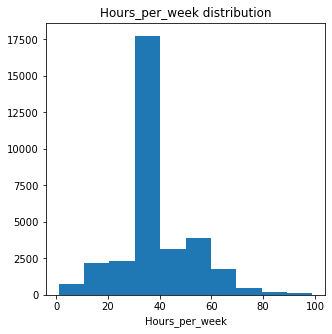

In [23]:
plt.figure(figsize=(5,5))
plt.hist(df['Hours_per_week'])
plt.title('Hours_per_week distribution')
plt.xlabel("Hours_per_week")
plt.show()

In [24]:
#using ordinal encoder for converting categorical features into numeric values
#using label encoder for converting target column's value to numeric values
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
enc = OrdinalEncoder()
lbe = LabelEncoder()
df["Workclass"] = enc.fit_transform(df["Workclass"].values.reshape(-1,1))
df["Marital_status"] = enc.fit_transform(df["Marital_status"].values.reshape(-1,1))
df["Occupation"] = enc.fit_transform(df["Occupation"].values.reshape(-1,1))
df["Relationship"] = enc.fit_transform(df["Relationship"].values.reshape(-1,1))
df["Race"] = enc.fit_transform(df["Race"].values.reshape(-1,1))
df["Sex"] = enc.fit_transform(df["Sex"].values.reshape(-1,1))
df["Native_country"] = enc.fit_transform(df["Native_country"].values.reshape(-1,1))

df["Income"] = lbe.fit_transform(df["Income"].values.reshape(-1,1))



/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,1
1,38,4.0,215646,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,1
2,53,4.0,234721,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,1
3,28,4.0,338409,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0
4,37,4.0,284582,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0
32556,40,4.0,154374,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1
32557,58,4.0,151910,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0
32558,22,4.0,201490,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,1


In [26]:
#Checking correlation
df.corr()['Income'].sort_values()

Relationship     -0.582453
Marital_status   -0.129337
Native_country   -0.008125
Education_num     0.012256
Fnlwgt            0.026882
Capital_loss      0.045572
Capital_gain      0.048477
Occupation        0.080328
Race              0.087197
Age               0.088832
Workclass         0.095942
Hours_per_week    0.229312
Sex               1.000000
Income            1.000000
Name: Income, dtype: float64

<AxesSubplot:>

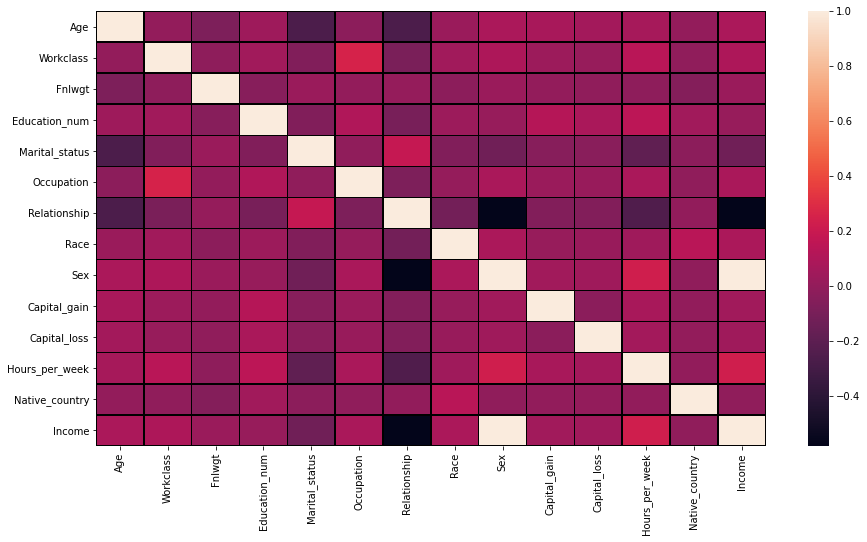

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), linewidths =0.5, linecolor ="black", fmt = ".2f")

In [28]:
#Checking skewness
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income            -0.719244
dtype: float64

In [70]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


There is skewness present in Capital_gain and Capital_loss

Age                  AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Workclass         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Fnlwgt            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Education_num     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Marital_status    AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Occupation        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Relationship      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Race                    AxesSubplot(0.125,0.125;0.0945122x0.343182)
Sex                  AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Capital_gain         AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Capital_loss         AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Hours_per_week       AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Native_country       AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Income               AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

<Figure size 21600x7200 with 0 Axes>

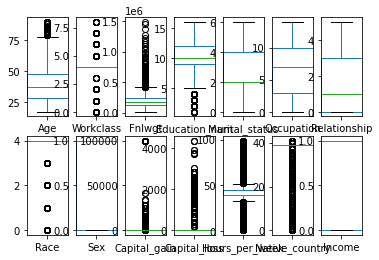

In [29]:
#Plotting boxplot to check outliers
plt.figure(figsize=(300,100))
df=df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
#checking outliers
df.plot(kind='box',widths=1,subplots=True,layout=(2,7))

Outliers are present in Age, Workclass, Fnlwgt, Education_num, Native_country,Hours_per_week,Capital_loss,Capital_gain and Race

In [34]:
from scipy.stats import zscore

z= np.abs(zscore(df))
#np.where(z>3)
df_new = df[(z < 3).all(axis=1)]

In [37]:
#dividing data into x (input) and y (target) variables
x=df_new.drop(['Income'], axis=1)# independent variables
y=df_new['Income']#target

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Model Selection

In [39]:
# Logistic Classifier

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

66.01

In [40]:
# KNeighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

81.5

In [41]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

68.56

In [42]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [43]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [44]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

65.94

In [45]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,acc_random_forest, acc_gaussian,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
5,Decision Tree,100.00
1,KNN,81.50
4,Naive Bayes,68.56
2,Logistic Regression,66.01
0,Support Vector Machines,65.94


Score is highest in Random Forest and Decision Tree hence selecting Random Forest

In [49]:
#Saving the model
import pickle
file_name = "churn.pkl"
pickle.dump(random_forest,open(file_name,"wb"))
#loading model
loaded_model = pickle.load(open("churn.pkl","rb"))
result = loaded_model.score(X_test,y_test)
print(result*100)


100.0
